## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
#mouse_metadata.head()

In [3]:
study_results = pd.read_csv(study_results_path)
#study_results.head()

In [4]:
# Combine the data into a single dataset
mouse_merged_df = mouse_metadata.merge(study_results, how = "outer", on = "Mouse ID")

#Check for NaN
#mouse_merged_df.isnull().sum()

# Display the data table for preview
mouse_merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
#rename columns for ease of use
mouse_merged_df = mouse_merged_df.rename(columns={"Mouse ID": "mouse_id", "Drug Regimen": "drug_regimen", "Sex" : "sex", 
                                         "Age_months" : "age_months", "Weight (g)" : "weight", "Timepoint" : "timepoint",
                                         "Tumor Volume (mm3)" : "tumor_vol", "Metastatic Sites" : "meta_sites"})
mouse_merged_df

,mouse_id,drug_regimen,sex,age_months,weight,timepoint,tumor_vol,meta_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
nmice = mouse_merged_df["mouse_id"].nunique()
print(f"There are {nmice} mice in the study.")

There are 249 mice in the study.


In [7]:
#Find mice with duplicate timepoints
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = mouse_merged_df[mouse_merged_df.duplicated(["mouse_id", "timepoint"], keep = False)] 
duplicate

,mouse_id,drug_regimen,sex,age_months,weight,timepoint,tumor_vol,meta_sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_cleaned_df = mouse_merged_df.set_index("mouse_id")
mouse_cleaned_df = mouse_cleaned_df.drop(["g989"])
mouse_cleaned_df = mouse_cleaned_df.reset_index()
mouse_cleaned_df.head()

,mouse_id,drug_regimen,sex,age_months,weight,timepoint,tumor_vol,meta_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
nmice2 = mouse_cleaned_df["mouse_id"].nunique()
print(f"We removed one mouse, leaving a total of {nmice2} mice.")

We removed one mouse, leaving a total of 248 mice.


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
mouse_cleaned_df.head()
drug_groups = mouse_cleaned_df.groupby("drug_regimen")
#drug_groups

In [11]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_vol_mean = pd.DataFrame(drug_groups["tumor_vol"].mean())
tumor_vol_median = pd.DataFrame(drug_groups["tumor_vol"].median())
tumor_vol_var = pd.DataFrame(drug_groups["tumor_vol"].var())
tumor_vol_std = pd.DataFrame(drug_groups["tumor_vol"].std())
tumor_vol_sem = pd.DataFrame(drug_groups["tumor_vol"].sem())

In [12]:
# Assemble the resulting series into a single summary dataframe.
summary_df = tumor_vol_mean.merge(tumor_vol_median, on = "drug_regimen", suffixes = ("_mean", "_median"))
summary_df = summary_df.merge(tumor_vol_var, on = 'drug_regimen')
summary_df = summary_df.merge(tumor_vol_std, on = "drug_regimen", suffixes = ("_var", "_std_dev"))
summary_df = summary_df.merge(tumor_vol_sem, on = "drug_regimen")
summary_df = summary_df.rename(columns = {"tumor_vol_mean" : "Mean of Tumor Volume (mm3)",
                                          "tumor_vol_median" : "Median of Tumor Volume (mm3)",
                                          "tumor_vol_var" : "Variance of Tumor Volume",
                                          "tumor_vol_std_dev" : "Standard Deviation of Tumor Volume",
                                          "tumor_vol" : "Standard Error of the Mean of Tumor Volume"})
summary_df

,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard Error of the Mean of Tumor Volume
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
# tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = mouse_cleaned_df.groupby(mouse_cleaned_df["drug_regimen"]).tumor_vol.agg(["mean", "median", "var", "std", 
                                               "sem"]) 
summary_agg_df = summary_agg_df.rename(columns = {"mean" : "Mean of Tumor Volume (mm3)", 
                                                  "median" : "Median of Tumor Volume (mm3)", 
                                                  "var" : "Variance of Tumor Volume", 
                                                  "std" : "Standard Deviation of Tumor Volume",
                                                  "sem" : "Standard Error of the Mean of Tumor Volume"})
summary_agg_df

,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard Error of the Mean of Tumor Volume
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

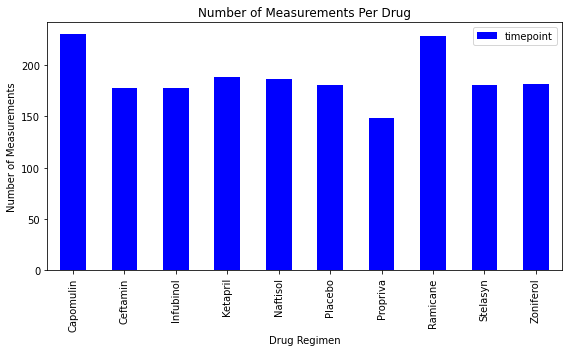

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_df = pd.DataFrame(drug_groups["timepoint"].count().reset_index())
ax = measurements_df.plot.bar(x='drug_regimen', y='timepoint', color = "blue", rot=90, figsize = (8,5))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.title("Number of Measurements Per Drug")
plt.tight_layout()
plt.show()

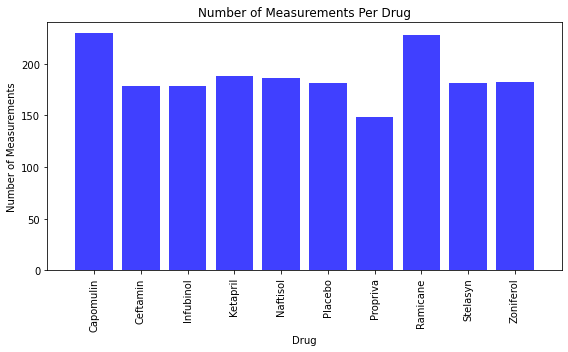

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measurements_df = pd.DataFrame(drug_groups["timepoint"].count().reset_index())
x_axis = np.arange(len(measurements_df))
tick_locations = [value for value in x_axis]
timepts = list(measurements_df["timepoint"])
#print(timepts)
plt.figure(figsize=(8,5))
plt.bar(x_axis, timepts, color='b', alpha=0.75, align="center")
plt.xticks(tick_locations, measurements_df["drug_regimen"], rotation="vertical")
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(measurements_df["timepoint"])+10)
plt.title("Number of Measurements Per Drug")
plt.xlabel("Drug")
plt.ylabel("Number of Measurements")
plt.tight_layout()
plt.show()

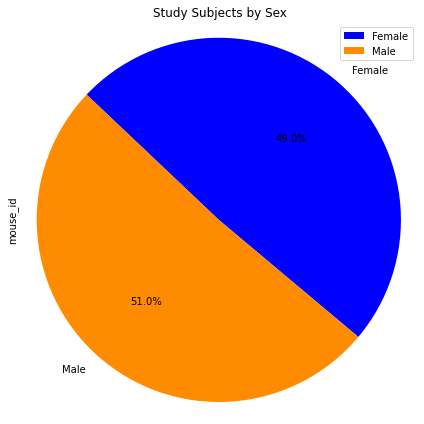

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = pd.DataFrame(mouse_cleaned_df.groupby("sex").count())
sex_df
colors = ["blue", "darkorange"]
plot = sex_df.plot.pie(y='mouse_id', figsize=(6, 6), colors = colors, autopct = "%1.1f%%", startangle = 320)
plt.title("Study Subjects by Sex")
plt.axis("equal")
plt.tight_layout()
plt.show()

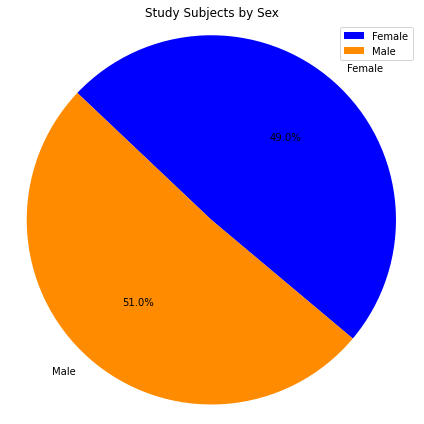

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df = pd.DataFrame(mouse_cleaned_df.groupby("sex").count())
sex_df = sex_df.reset_index()
sex_df
sizes = sex_df.loc[:, "mouse_id"]
#print(sizes)
labels = ["Female", "Male"]
colors = ["blue", "darkorange"]
plt.figure(figsize=(6,6))
plt.pie(sizes, labels = labels, colors = colors, startangle = 320, autopct = "%1.1f%%")
plt.axis("equal")
plt.title("Study Subjects by Sex")
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

tumor_data_df = pd.DataFrame(mouse_cleaned_df.groupby(["drug_regimen", "mouse_id"]).max())
tumor_data_df = tumor_data_df.reset_index()
tumor_data_df = tumor_data_df.loc[(tumor_data_df['drug_regimen'] == "Capomulin") | 
                                  (tumor_data_df['drug_regimen'] == "Ceftamin") |
                                  (tumor_data_df['drug_regimen'] == "Infubinol") | 
                                  (tumor_data_df['drug_regimen'] == "Ramicane")]
tumor_data_df.head()

,drug_regimen,mouse_id,sex,age_months,weight,timepoint,tumor_vol,meta_sites
0,Capomulin,b128,Female,9,22,45,45.651331,2
1,Capomulin,b742,Male,7,21,45,45.000000,0
2,Capomulin,f966,Male,16,17,20,45.000000,0
3,Capomulin,g288,Male,3,19,45,46.304003,1
4,Capomulin,g316,Female,22,22,45,46.809225,2


In [19]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(tumor_data_df, mouse_cleaned_df, how="inner", on = ["mouse_id", "timepoint"])
tumor_volume_df = tumor_volume_df[["drug_regimen_x", "mouse_id", "sex_x", "age_months_x", "weight_y", "timepoint", 
                                  "tumor_vol_y", "meta_sites_y"]]
tumor_volume_df = tumor_volume_df.rename(columns = {"drug_regimen_x" : "drug_regimen",
                                          "sex_x" : "sex",
                                          "age_months_x" : "age_months",
                                          "weight_y" : "weight",
                                          "tumor_vol_y" : "tumor_vol",
                                          "meta_sites_y" : "meta_sites"})
tumor_volume_df.head()

,drug_regimen,mouse_id,sex,age_months,weight,timepoint,tumor_vol,meta_sites
0,Capomulin,b128,Female,9,22,45,38.982878,2
1,Capomulin,b742,Male,7,21,45,38.939633,0
2,Capomulin,f966,Male,16,17,20,30.485985,0
3,Capomulin,g288,Male,3,19,45,37.074024,1
4,Capomulin,g316,Female,22,22,45,40.159220,2


In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
drug_regimen = tumor_volume_df.groupby("drug_regimen")
capomulin_df = pd.DataFrame(drug_regimen.get_group("Capomulin"))
#capomulin_df.head()
cap_tumor_vol = list(capomulin_df["tumor_vol"])
cap_tumor_vol.sort()
#print(cap_tumor_vol)

In [21]:
capomulin_mean = capomulin_df["tumor_vol"].mean()
capomulin_lower = capomulin_df["tumor_vol"].quantile(q=0.25)
capomulin_upper = capomulin_df["tumor_vol"].quantile(q=0.75)
capomulin_iqr = capomulin_upper - capomulin_lower
cap_lower_b = capomulin_lower - (capomulin_iqr * 1.5)
cap_upper_b = (capomulin_iqr * 1.5) + capomulin_upper
cap_outlier = capomulin_df.loc[(capomulin_df["tumor_vol"] > cap_upper_b) | (capomulin_df["tumor_vol"] < cap_lower_b)]
print("Capomulin Data:")
print(f"The lower quartile is {capomulin_lower}.")
print(f"The mean is {capomulin_mean}.")
print(f"The upper quartile is {capomulin_upper}.")
print(f"The IQR is {capomulin_iqr}.")
print(f"The lower bound is {cap_lower_b} and the upper bound is {cap_upper_b}.")
print(f"A search for outliers produced {len(cap_outlier)}.")

Capomulin Data:
The lower quartile is 32.37735684.
The mean is 36.6675677192.
The upper quartile is 40.1592203.
The IQR is 7.781863460000004.
The lower bound is 20.70456164999999 and the upper bound is 51.83201549.
A search for outliers produced 0.


In [22]:
ceftamin_df = pd.DataFrame(drug_regimen.get_group("Ceftamin"))
#ceftamin_df.head()
cef_tumor_vol = list(ceftamin_df["tumor_vol"])
cef_tumor_vol.sort()
#print(cef_tumor_vol)

In [23]:
ceftamin_mean = ceftamin_df["tumor_vol"].mean()
ceftamin_lower = ceftamin_df["tumor_vol"].quantile(q=0.25)
ceftamin_upper = ceftamin_df["tumor_vol"].quantile(q=0.75)
ceftamin_iqr = ceftamin_upper - ceftamin_lower
cef_lower_b = ceftamin_lower - (ceftamin_iqr * 1.5)
cef_upper_b = (ceftamin_iqr * 1.5) + ceftamin_upper
cef_outlier = ceftamin_df.loc[(ceftamin_df["tumor_vol"] > cef_upper_b) | (ceftamin_df["tumor_vol"] < cef_lower_b)]
print("Ceftamin Data:")
print(f"The lower quartile is {ceftamin_lower}.")
print(f"The mean is {ceftamin_mean}.")
print(f"The upper quartile is {ceftamin_upper}.")
print(f"The IQR is {ceftamin_iqr}.")
print(f"The lower bound is {cef_lower_b} and the upper bound is {cef_upper_b}.")
print(f"A search for outliers produced {len(cef_outlier)}.")

Ceftamin Data:
The lower quartile is 48.72207785.
The mean is 57.7539768252.
The upper quartile is 64.29983003.
The IQR is 15.577752179999997.
The lower bound is 25.355449580000002 and the upper bound is 87.66645829999999.
A search for outliers produced 0.


In [24]:
infubinol_df = pd.DataFrame(drug_regimen.get_group("Infubinol"))
#infubinol_df.head()
inf_tumor_vol = list(infubinol_df["tumor_vol"])
inf_tumor_vol.sort()
#print(inf_tumor_vol)

In [25]:
infubinol_mean = infubinol_df["tumor_vol"].mean()
infubinol_lower = infubinol_df["tumor_vol"].quantile(q=0.25)
infubinol_upper = infubinol_df["tumor_vol"].quantile(q=0.75)
infubinol_iqr = infubinol_upper - infubinol_lower
inf_lower_b = infubinol_lower - (infubinol_iqr * 1.5)
inf_upper_b = (infubinol_iqr * 1.5) + infubinol_upper
inf_outlier = infubinol_df.loc[(infubinol_df["tumor_vol"] > inf_upper_b) | (infubinol_df["tumor_vol"] < inf_lower_b)]
print("Infubinol Data:")
print(f"The lower quartile is {infubinol_lower}.")
print(f"The mean is {infubinol_mean}.")
print(f"The upper quartile is {infubinol_upper}.")
print(f"The IQR is {infubinol_iqr}.")
print(f"The lower bound is {inf_lower_b} and the upper bound is {inf_upper_b}.")
print(f"A search for outliers produced {len(inf_outlier)}.")

Infubinol Data:
The lower quartile is 54.04860769.
The mean is 58.1782457852.
The upper quartile is 65.52574285.
The IQR is 11.477135160000003.
The lower bound is 36.83290494999999 and the upper bound is 82.74144559000001.
A search for outliers produced 1.


In [26]:
ramicane_df = pd.DataFrame(drug_regimen.get_group("Ramicane"))
#ramicane_df.head()
ram_tumor_vol = list(ramicane_df["tumor_vol"])
ram_tumor_vol.sort()
#print(ram_tumor_vol)

In [27]:
ramicane_mean = ramicane_df["tumor_vol"].mean()
ramicane_lower = ramicane_df["tumor_vol"].quantile(q=0.25)
ramicane_upper = ramicane_df["tumor_vol"].quantile(q=0.75)
ramicane_iqr = ramicane_upper - ramicane_lower
ram_lower_b = ramicane_lower - (ramicane_iqr * 1.5)
ram_upper_b = (ramicane_iqr * 1.5) + ramicane_upper
ram_outlier = ramicane_df.loc[(ramicane_df["tumor_vol"] > ram_upper_b) | (ramicane_df["tumor_vol"] < ram_lower_b)]
print("Ramicane Data:")
print(f"The lower quartile is {ramicane_lower}.")
print(f"The mean is {ramicane_mean}.")
print(f"The upper quartile is {ramicane_upper}.")
print(f"The IQR is {ramicane_iqr}.")
print(f"The lower bound is {ram_lower_b} and the upper bound is {ram_upper_b}.")
print(f"A search for outliers produced {len(ram_outlier)}.")

Ramicane Data:
The lower quartile is 31.56046955.
The mean is 36.1913904284.
The upper quartile is 40.65900627.
The IQR is 9.098536719999998.
The lower bound is 17.912664470000003 and the upper bound is 54.30681135.
A search for outliers produced 0.


In [28]:
# Put treatments into a list
drug_list = list((tumor_volume_df["drug_regimen"]).unique())
print(drug_list)

['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']


In [29]:
tumor_comparison = list(zip(cap_tumor_vol, cef_tumor_vol, inf_tumor_vol, ram_tumor_vol))
#print(tumor_comparison)

In [30]:
tumor_data_df = pd.DataFrame(tumor_comparison, columns = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"])
tumor_data_df.head()

,Capomulin,Ceftamin,Infubinol,Ramicane
0,23.343598,45.000000,36.321346,22.050126
1,28.430964,45.000000,45.699331,29.128472
2,28.484033,45.000000,46.250112,30.276232
3,30.485985,45.000000,47.010364,30.564625
4,31.023923,46.784535,50.005138,30.638696


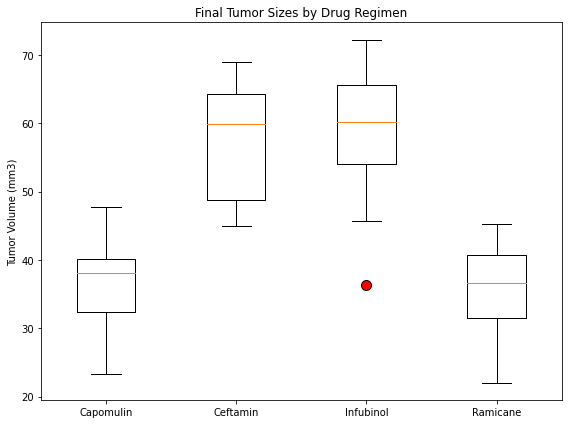

In [43]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = tumor_data_df["Capomulin"], tumor_data_df["Ceftamin"], tumor_data_df["Infubinol"], tumor_data_df["Ramicane"]
labels = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]
flierprops = dict(marker='o', markerfacecolor='red', markersize=10,
                  linestyle='none')
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title("Final Tumor Sizes by Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(data, labels = labels, flierprops = flierprops)
plt.tight_layout()
plt.show()

## Line and Scatter Plots

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
b128 = mouse_cleaned_df.loc[mouse_cleaned_df["mouse_id"] == "b128"]
#b128

x_axis = np.arange(0, 50, 5)
#x_axis

b128_vol = list(b128["tumor_vol"])
#print(b128_vol)

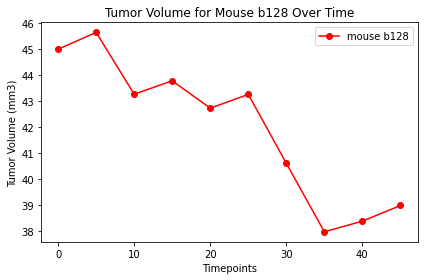

In [33]:
#draw plot
plt.plot(x_axis, b128_vol, marker = "o", color="red", label = "mouse b128")
plt.title("Tumor Volume for Mouse b128 Over Time")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

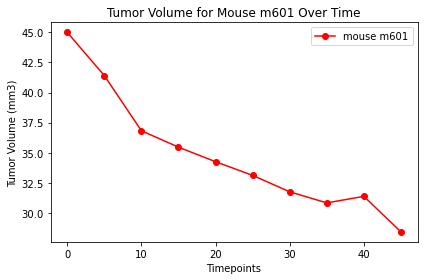

In [34]:
#spot check a couple of other mice
m601 = mouse_cleaned_df.loc[mouse_cleaned_df["mouse_id"] == "m601"]
x_axis = np.arange(0, 50, 5)
m601_vol = list(m601["tumor_vol"])

#draw plot
plt.plot(x_axis, m601_vol, marker = "o", color="red", label = "mouse m601")
plt.title("Tumor Volume for Mouse m601 Over Time")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

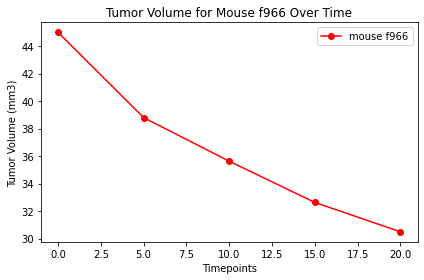

In [35]:
f966 = mouse_cleaned_df.loc[mouse_cleaned_df["mouse_id"] == "f966"]
x_axis = np.arange(0, 25, 5)
f966_vol = list(f966["tumor_vol"])

#draw plot
plt.plot(x_axis, f966_vol, marker = "o", color="red", label = "mouse f966")
plt.title("Tumor Volume for Mouse f966 Over Time")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = pd.DataFrame(mouse_cleaned_df.groupby(["drug_regimen", "mouse_id"]).mean().reset_index())
cap_df = cap_df.loc[cap_df["drug_regimen"] == "Capomulin"]
#cap_df.head()

x_axis = list(cap_df["weight"])
#x_axis

y_values = list(cap_df["tumor_vol"])
#y_values

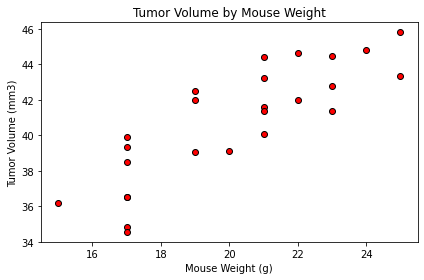

In [37]:
#draw plot
plt.scatter(x_axis, y_values, marker = "o", facecolors = "red", edgecolors = "black", s=None, alpha = 1)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume by Mouse Weight")
plt.tight_layout()
plt.show()

## Correlation and Regression

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap_corr = st.pearsonr(cap_df["weight"], cap_df["tumor_vol"])
#print(cap_corr)
print(f"The correlation between both factors is {round(cap_corr[0],2)}")

The correlation between both factors is 0.84


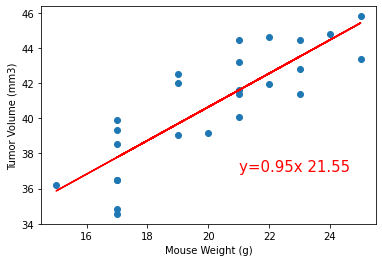

In [39]:
#compute linear regression
x_values = cap_df["weight"]
y_values = cap_df["tumor_vol"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (21,37), fontsize=15, color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

# Conclusions:
Of the ten drug regimens offered for the treatment of this particular type of cancer (9 + placebo), two stand out as significantly effective: Capomulin and Ramicane. Mice on both of these regimens showed significant decrease of tumor volume over time, as compared to placebo treatment. Ramicane, with a mean final tumor size of 36.19mm^3, may be slightly more effective than Capomulin (mean 36.67 mm^3).

Capomulin shows a very strong corrlation between final tumor volume and the weight of the test mice. While we would need to further analyze the data to ensure that all other factors are controlled for, we do see a suggestion that Capomulin is most effective in smaller mice. This opens interesting questions about how mouse obesity might play a role in the efficacy of drug treatment, or the aggressiveness of the cancer. 

This analysis begins to indicate some promising directions for the treatment of cancer, but is far from conclusive without further study. For example, we could also look at the effectiveness of particular regimens by comparing the sexes or ages of the test subjects, and it would be useful to calculate the correlation coefficient and linear regression for Ramicane, as well as the placebo, in order to visualize what a "normal" progression of the disease would look like.